# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


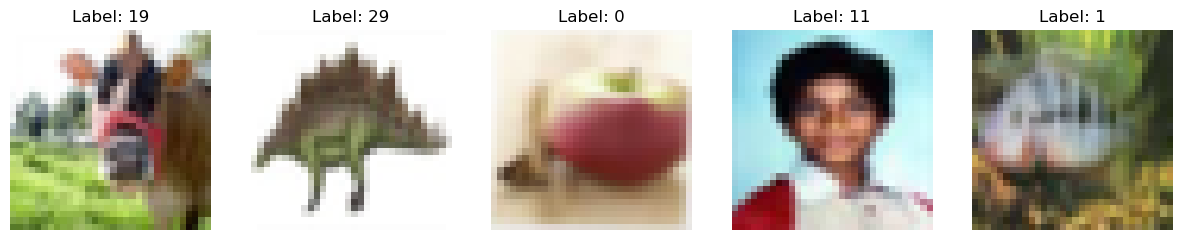

In [2]:
# Your code here

import matplotlib.pyplot as plt

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(set(y_train.flatten())))

# Display a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Label: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

# Print the model summary
model.summary()


c:\Users\peach\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [6]:
from keras import optimizers

# Your code here
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Loss function: categorical_crossentropy (used for multi-class classification problems with one-hot encoded labels)
# Optimizer: adam (commonly used optimizer due to its adaptive learning rate)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here

history = model.fit(
    x_train, y_train,
    epochs=20,  
    batch_size=32,
    validation_data=(x_val, y_val)
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.0455 - loss: 4.2996 - val_accuracy: 0.1587 - val_loss: 3.5521
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1857 - loss: 3.4167 - val_accuracy: 0.2081 - val_loss: 3.2488
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2455 - loss: 3.0502 - val_accuracy: 0.2564 - val_loss: 3.0018
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2947 - loss: 2.8128 - val_accuracy: 0.2965 - val_loss: 2.8370
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3256 - loss: 2.6474 - val_accuracy: 0.3099 - val_loss: 2.7794
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3577 - loss: 2.5089 - val_accuracy: 0.3124 - val_loss: 2.7838
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3801 - loss: 2.3888 - val_accuracy: 0.3299 - val_loss: 2.6703
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4011 -

In [8]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    x_train, y_train,
    epochs=20,  # Use a higher number for early stopping
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.6047 - loss: 1.3860 - val_accuracy: 0.3436 - val_loss: 3.1004
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6236 - loss: 1.3217 - val_accuracy: 0.3397 - val_loss: 3.1300
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6336 - loss: 1.2837 - val_accuracy: 0.3386 - val_loss: 3.1722
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6462 - loss: 1.2324 - val_accuracy: 0.3411 - val_loss: 3.2890
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6536 - loss: 1.1926 - val_accuracy: 0.3242 - val_loss: 3.4377
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6626 - loss: 1.1656 - val_accuracy: 0.3357 - val_loss: 3.4530


In [9]:
history = model.fit(
    x_train, y_train,
    epochs=6,  # Reduced number of epochs based on observed trends
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.6270 - loss: 1.3058 - val_accuracy: 0.3419 - val_loss: 3.1430
Epoch 2/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6354 - loss: 1.2749 - val_accuracy: 0.3434 - val_loss: 3.1697
Epoch 3/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6432 - loss: 1.2524 - val_accuracy: 0.3463 - val_loss: 3.2621
Epoch 4/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6528 - loss: 1.1948 - val_accuracy: 0.3354 - val_loss: 3.3311
Epoch 5/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6654 - loss: 1.1588 - val_accuracy: 0.3287 - val_loss: 3.5139
Epoch 6/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6716 - loss: 1.1259 - val_accuracy: 0.3371 - val_loss: 3.5271


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [15]:
# Your code here
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy: {test_accuracy}")


from keras.metrics import top_k_categorical_accuracy

# Compile the model with top_k_categorical_accuracy
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', top_k_categorical_accuracy]
)

# After training, get the top-5 accuracy
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
top5_accuracy = history.history.get('val_top_k_categorical_accuracy', [None])[-1]
print(f"Top-5 Accuracy: {top5_accuracy}")

# A top-5 accuracy of 0.5961 indicates that the model's top 5 predictions include the correct label approximately 59.61% of the time.

313/313 - 1s - 4ms/step - accuracy: 0.3301 - loss: 3.5629
Accuracy: 0.33009999990463257
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.6737 - loss: 1.1176 - top_k_categorical_accuracy: 0.9140 - val_accuracy: 0.3359 - val_loss: 3.6053 - val_top_k_categorical_accuracy: 0.6304
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6941 - loss: 1.0495 - top_k_categorical_accuracy: 0.9248 - val_accuracy: 0.3313 - val_loss: 3.6915 - val_top_k_categorical_accuracy: 0.6260
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.6964 - loss: 1.0338 - top_k_categorical_accuracy: 0.9253 - val_accuracy: 0.3300 - val_loss: 3.8449 - val_top_k_categorical_accuracy: 0.6213
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7095 - loss: 0.9823 - top_k_categorical_accuracy: 0.9330 - val_accuracy: 0.3230 - val_loss: 3.9115 - val_top_k_categorical_accuracy: 0.6113
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.71

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

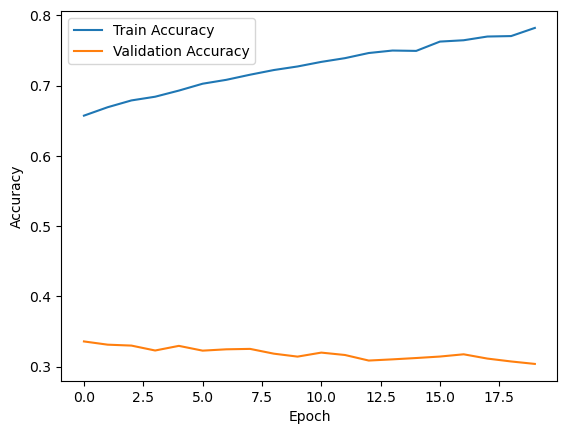

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [17]:
# Your code here

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

import numpy as np

# Function to plot image and model's prediction
def plot_image_and_prediction(image, true_label, predicted_probs, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"{title}\nTrue: {true_label}, Predicted: {np.argmax(predicted_probs)}\nProbabilities: {predicted_probs}")
    plt.axis('off')
    plt.show()

# Select a correct prediction
correct_indices = [i for i in range(len(y_test)) if y_test[i].argmax() == model.predict(x_test[i:i+1]).argmax()]
incorrect_indices = [i for i in range(len(y_test)) if y_test[i].argmax() != model.predict(x_test[i:i+1]).argmax()]

# Assuming correct_indices and incorrect_indices are not empty
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

# Get the image, true label, and predicted probabilities
correct_image = x_test[correct_index]
correct_true_label = y_test[correct_index].argmax()
correct_pred_probs = model.predict(np.expand_dims(correct_image, axis=0))[0]

incorrect_image = x_test[incorrect_index]
incorrect_true_label = y_test[incorrect_index].argmax()
incorrect_pred_probs = model.predict(np.expand_dims(incorrect_image, axis=0))[0]

# Plot the results
plot_image_and_prediction(correct_image, correct_true_label, correct_pred_probs, "Correctly Classified")
plot_image_and_prediction(incorrect_image, incorrect_true_label, incorrect_pred_probs, "Incorrectly Classified")


### Plots of Training and Validation Accuracy:
- Training Accuracy: This plot shows how the model's accuracy on the training data improves over epochs. We see an upward trend indicating the model is learning from the training data.
- Validation Accuracy: This plot shows the model's accuracy on the validation set over epochs. The validation accuracy fluctuate , which indicates how well the model generalizes to unseen data.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [18]:
# Your code here

from keras.layers import Dropout

# Define the enhanced model
model_enhanced = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(100, activation='softmax')
])

model_enhanced.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.0278 - loss: 4.4124 - val_accuracy: 0.1163 - val_loss: 3.8047
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.1092 - loss: 3.8151 - val_accuracy: 0.1736 - val_loss: 3.4683
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.1613 - loss: 3.5055 - val_accuracy: 0.2237 - val_loss: 3.1818
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1962 - loss: 3.3026 - val_accuracy: 0.2499 - val_loss: 3.0539
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2202 - loss: 3.1890 - val_accuracy: 0.2617 - val_loss: 2.9906
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2384 - loss: 3.0772 - val_accuracy: 0.2882 - val_loss: 2.8530
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2543 - loss: 2.9777 - val_accuracy: 0.3071 - val_loss: 2.7721
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2803 -

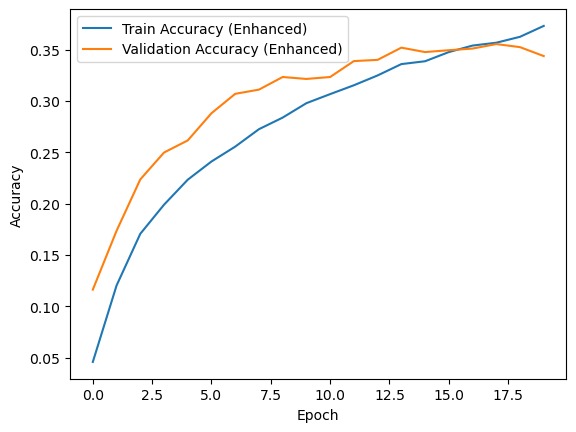

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

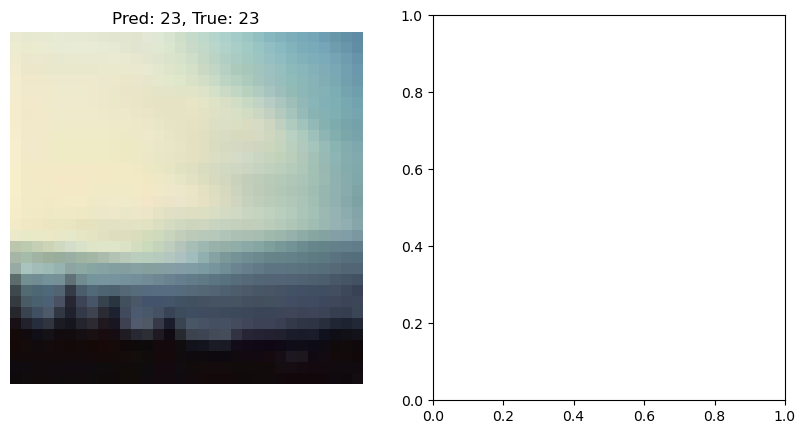

In [19]:
# Your code here

history_enhanced = model_enhanced.fit(
    x_train, y_train,
    epochs=20,  # Same number of epochs for comparison
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Evaluate on test set
test_loss_enhanced, test_accuracy_enhanced = model_enhanced.evaluate(x_test, y_test, verbose=2)
print(f"Enhanced Accuracy: {test_accuracy_enhanced}")

# Plot training and validation accuracy
plt.plot(history_enhanced.history['accuracy'], label='Train Accuracy (Enhanced)')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy (Enhanced)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot example images and predictions for enhanced model
plot_image_predictions(model_enhanced, x_test[correct_indices[0]:correct_indices[0]+1], y_test[correct_indices[0]:correct_indices[0]+1])
plot_image_predictions(model_enhanced, x_test[incorrect_indices[0]:incorrect_indices[0]+1], y_test[incorrect_indices[0]:incorrect_indices[0]+1])


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.